## MLP vs CNN

##### Keras model module

    Import the Sequential model type from Keras. This is an interface to build a linear stack of neural network layers

In [0]:
from keras.models import Sequential

Using TensorFlow backend.


##### Keras core layers
    
    Import the "core" layers from Keras. These are the layers that are used in almost any neural network:

In [0]:
from keras.layers import core

##### Keras CNN layers

     Import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train on image data:

In [0]:
from keras.layers import convolutional, pooling

#### Load image data from MNIST.

    MNIST database of handwritten digits

    Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [0]:
from keras.datasets import fashion_mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Returns:

    2 tuples:
            x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
            y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).

Arguments:

    path: if you do not have the index file locally (at '~/.keras/datasets/' + path), it will be downloaded to this location.


Look at the shape of the dataset:

In [0]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## MLP for MNIST Digit Recognition

### Prepare MNIST Data for MLP

Convert our data type to float32 and normalize our data values to the range [0, 1]

Note: Max value X_train/X_test can take is 255, so it is divided by 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### Preprocess class labels for Keras

Look at the shape of our class label data

In [0]:
print (y_train.shape)

(60000,)


We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.

In [0]:
print (y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


##### Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
from keras.utils import to_categorical

In [0]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

Take another look:

In [0]:
print (Y_train.shape)

(60000, 10)


In [0]:
print (Y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# Same number of samples, but flatten the 28, 28 to 28*28 (784)

X_train_mlp = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

X_test_mlp = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])


In [0]:
print (X_train_mlp.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 28, 28) (10000,)


In [0]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation("softmax"))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [0]:
history = model.fit(X_train_mlp, Y_train, validation_split = 0.2,
                    batch_size = 48000, epochs = 40)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/40





48000/48000 [==============================] - 10s 207us/step - loss: 3.1294 - acc: 0.0904 - val_loss: 1.3226 - val_acc: 0.5726
Epoch 2/40
48000/48000 [==============================] - 0s 4us/step - loss: 1.4681 - acc: 0.5157 - val_loss: 0.9059 - val_acc: 0.6883
Epoch 3/40
48000/48000 [==============================] - 0s 3us/step - loss: 1.0252 - acc: 0.6576 - val_loss: 0.8494 - val_acc: 0.7132
Epoch 4/40
48000/48000 [==============================] - 0s 3us/step - loss: 0.8761 - acc: 0.7039 - val_loss: 0.7758 - val_acc: 0.7414
Epoch 5/40
48000/48000 [==============================] - 0s 3us/step - loss: 0.7828 - acc: 0.7325 - val_loss: 0.6835 - val_acc: 0.7690
Epoch 6/40
48000/48000 [==============================] - 0s 3us/step - loss: 0.7277 - acc: 0.7496 - val_loss: 0.6180 - val_acc: 0.7895
Epoch 7/40
48000/48000 [=====

In [0]:
import matplotlib.pyplot as plt

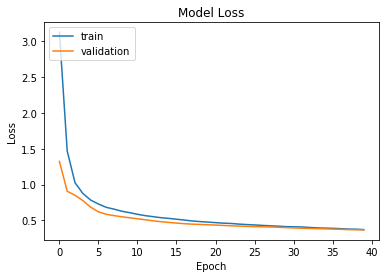

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

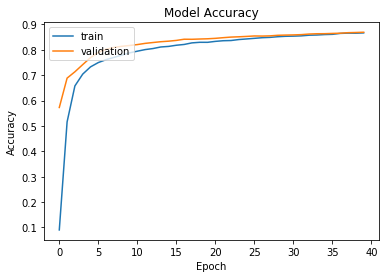

In [0]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [0]:
scores = model.evaluate(X_test_mlp, Y_test, verbose=0)

print("[INFO] test score - {}".format(scores[0]))

print("[INFO] test accuracy - {}".format(scores[1]))

[INFO] test score - 0.3945424437046051
[INFO] test accuracy - 0.8582


# What are CNNs?

<br />

* How are images represented again?

<br />

![](img/image_representation.gif)

<br />

* What is a CNN?

![](img/lecun_net.png)

<br />

* The four main operations in a CNN:

    * Convolution
    * Non Linearity (ReLU)
    * Pooling or Sub Sampling
    * Classification (Fully Connected Layer)

<br />

* Some important convolving operations used in ML based image classifiers, before deep learning

<br />

![](img/prior_convolving_operations.png)


## Understanding Convolutions

![](img/convolutions.gif)

![](img/convolution_matrix.gif)

![](img/convolution_real_image.gif)

### Output Feature Map Dimensions after Convolving

![](img/conv_output_feature_map_formula.png)

        W - Width of the input feature map
        
        K - Width of the Kernel / Filter
        
        P - Padding Layer dimension
        
        S - Stride

### Zero Padding in Keras

  In Keras we have two types of Padding:
    
      (i) Valid Padding : Any layer that does not fully intersect with the filter is ignored (NO PADDING!)
        
      (ii) Same Padding : Adds Zero Padding such that the output feature map has similar dimensions to the input                      feature map

![](img/zero_padding.png)

![](img/same_padding.gif)

## CNN for MNIST Digit Recognition

#### Preprocess input data for Keras

In [0]:
print (X_train.shape[0])

60000


Reshape input data

    When using the tensorflow backend, you must explicitly declare a dimension for the depth of the input image. 
    E.g. a full-color image with all 3 RGB channels will have a depth of 3.

    Our MNIST images only have a depth of 1, but we must explicitly declare that. 

    In other words, we want to transform our dataset from having shape (n, width, height) to (n, width, height, channel).

In [0]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

 print X_train's dimensions

In [0]:
print (X_train.shape)
print (X_train_cnn.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


#### Define model architecture.

Declaring a sequential model

In [0]:
cnn_model = Sequential()

Declare the input layer

CNN input layer

In [0]:
from keras.layers.convolutional import Conv2D

In [0]:
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), activation='relu', input_shape=(28,28,1)))

###### 2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(28, 28, 1) for 28x28 gray pictures in data_format="channels_last".

First parameters correspond to the number of convolution filters 

Next 2 parameters correspond to kernal size

###### Add more layers to our model

![](img/max_pooling.jpg)

In [0]:
from keras.layers.pooling import MaxPooling2D

In [0]:
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

In [0]:
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

In [0]:
cnn_model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

Dropout

    This is a method for regularizing our model in order to prevent overfitting. 

MaxPooling2D 

    Is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

So far, for model parameters, we've added two Convolution layers. To complete our model architecture, let's add a fully connected layer and then the output layer

In [0]:
from keras.layers.core import Flatten

In [0]:
cnn_model.add(Flatten())
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(10, activation='softmax'))

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

#### Compile model

Compile the model by providing the loss function and the optimizer 

In [0]:
from keras.optimizers import Adam

In [0]:
custom_adam = Adam(lr = 0.01, decay = 0.01)

In [0]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = custom_adam, metrics = ['accuracy'])

In [0]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)         

#### Fit model on training data.

In [0]:
cnn_model.fit(X_train_cnn, Y_train, batch_size = 4096, epochs = 40, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 8s 172us/step - loss: 1.7949 - acc: 0.3546 - val_loss: 0.9996 - val_acc: 0.6064
Epoch 2/40
48000/48000 [==============================] - 1s 27us/step - loss: 1.0612 - acc: 0.5878 - val_loss: 0.9265 - val_acc: 0.6178
Epoch 3/40
48000/48000 [==============================] - 1s 27us/step - loss: 0.8743 - acc: 0.6745 - val_loss: 0.7194 - val_acc: 0.7274
Epoch 4/40
48000/48000 [==============================] - 1s 27us/step - loss: 0.7783 - acc: 0.7063 - val_loss: 0.6796 - val_acc: 0.7404
Epoch 5/40
48000/48000 [==============================] - 1s 27us/step - loss: 0.7153 - acc: 0.7322 - val_loss: 0.6475 - val_acc: 0.7553
Epoch 6/40
48000/48000 [==============================] - 1s 27us/step - loss: 0.6667 - acc: 0.7513 - val_loss: 0.6188 - val_acc: 0.7682
Epoch 7/40
48000/48000 [==============================] - 1s 27us/step - loss: 0.6446 - acc: 0.7569 - val_loss: 0.6789 - val_ac

#### Evaluate the model on test data.

In [0]:
score = cnn_model.evaluate(X_test_cnn, Y_test)

print(score)

10000/10000 [==============================] - 1s 92us/step
[0.36018063666820527, 0.8799]


#### Make predictions on test data 

In [0]:
# calculate predictions
predictions = cnn_model.predict(X_test_cnn)

In [0]:
print (predictions)

[[3.51519302e-05 2.28195458e-05 4.39325640e-06 ... 2.02877466e-02
  4.17247247e-05 9.71505821e-01]
 [2.11025290e-02 3.01592430e-04 7.84454286e-01 ... 1.56773567e-05
  2.63804896e-03 1.26848490e-05]
 [1.27264602e-05 9.99860287e-01 3.48501567e-06 ... 1.95554488e-08
  4.96183588e-07 1.96147153e-06]
 ...
 [1.00987876e-04 3.00309239e-06 8.62599700e-05 ... 1.28742293e-04
  9.98743832e-01 3.23215409e-06]
 [2.80859258e-05 9.99690056e-01 6.29264696e-06 ... 4.66087080e-08
  1.27220903e-06 3.05675576e-06]
 [5.96238952e-03 1.52971677e-03 4.98809991e-03 ... 1.84271276e-01
  1.21921420e-01 1.28180217e-02]]


In [0]:
y_pred_class = cnn_model.predict_classes(X_test_cnn)

In [0]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8799

In [0]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[891,   0,  25,  19,   1,   0,  51,   0,  13,   0],
       [  3, 966,   0,  24,   1,   0,   4,   0,   2,   0],
       [ 14,   0, 879,   7,  46,   0,  48,   0,   6,   0],
       [ 28,   1,  25, 894,  19,   0,  32,   0,   1,   0],
       [  0,   0,  62,  39, 773,   0, 123,   0,   3,   0],
       [  0,   0,   0,   2,   0, 956,   0,  23,   2,  17],
       [206,   0, 101,  27, 103,   0, 543,   0,  20,   0],
       [  0,   0,   0,   0,   0,  11,   0, 943,   1,  45],
       [  1,   0,   1,   4,   1,   4,   4,   0, 985,   0],
       [  0,   0,   0,   0,   0,   6,   0,  25,   0, 969]])

Reference: 

    https://keras.io/
    https://elitedatascience.com
    http://scikit-learn.org/stable/modules/classes.html